In [34]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import matplotlib.pyplot as plt

In [105]:
#%%
from re import I 
import matplotlib as mpl
import matplotlib.pylab as plt
import matplotlib.dates as mdates
import seaborn as sns

def setup_plot():
    mpl.rcParams['lines.linewidth'] = 1
    #mpl.rcParams['font.family'] = 'Microsoft Sans Serif'
    mpl.rcParams['font.family'] = 'Arial'

    
    #these don't work for some reason
    #mpl.rcParams['axes.titleweight'] = 'bold'
    #mpl.rcParams['axes.titlesize'] = '90'
    
    sns.set_theme(style="white", palette='pastel', font = 'Arial', font_scale=1.5)

    #sns.set_theme(style="white", palette='pastel', font = 'Microsoft Sans Serif', font_scale=1)
    #myFmt = mdates.DateFormatter('%b #Y')
    
    print("Plot settings applied")

setup_plot()

Plot settings applied


In [35]:
import re
from nltk import FreqDist
import matplotlib.pyplot as plt
import re, string, unicodedata
import nltk
import contractions
import inflect
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
# Helper functions for preprocessing

def replace_contractions(text):
    """Replace contractions in string of text"""
    return contractions.fix(text)

def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = word.lower()
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def remove_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    new_words = []
    for word in words:
        if word.isdigit():
            continue
        else:
            new_words.append(word)
    return new_words


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords.words('english'):
            new_words.append(word)
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = to_lowercase(words)
    words = remove_punctuation(words)
    words = remove_numbers(words)
    words = remove_stopwords(words)
    return words

def preprocess(sample):
    sample = remove_URL(sample)
    sample = replace_contractions(sample)
    # Tokenize
    words = nltk.word_tokenize(sample)

    # Normalize
    return normalize(words)

In [111]:
putin_mask = np.array(Image.open('/home/kjb/Desktop/DTU - Semester 4/DTU - Computational Social Science/02467-final/word-frequency/image-mask/p.png'))
def transform_format(val):
    if val == 0:
        return 255
    else:
        return val
#t = np.vectorize(transform_format)(putin_mask)

In [87]:
import pandas as pd

path = '../data/dataframes/translated-text-ru-uk_sentiment.pkl'
df =pd.read_pickle(path)
# %%

df['date'] = pd.to_datetime(df['created_time'])
df.index = df['date']

# %%

def president_conversion(presidents):
    """
    0 -> No presidents
    1 -> putin
    2 -> zelenskyy
    3 -> putin and zelenskyy
    """
    return ('putin' in presidents) + ('zelenskyy' in presidents) * 2

df['president_mention_idx'] = np.vectorize(president_conversion)(df['president_mentioned'].to_numpy())

# three

def get_lang(df, lang):
    return df[(df['lang'] == lang).to_numpy()]

def get_nationality(df, nationality):
    return df[(df['nationality'] == nationality).to_numpy()]

df_uk = get_nationality(df, 'uk') 
df_ru = get_nationality(df, 'ru') 

def is_not_none(val):
    return val is not None

def is_not_empty(item):
    return len(item) != 0

def get_president_text(df, normalize=True):
    p_all = df[(df['president_mention_idx'] == 1).to_numpy()]
    p_text = " ".join(p_all.iloc[np.vectorize(is_not_none)(p_all['en_text'])]['en_text'])
    
    z_all = df[(df['president_mention_idx'] == 2).to_numpy()]
    z_text = " ".join(z_all.iloc[np.vectorize(is_not_none)(z_all['en_text'])]['en_text'])
    
    if normalize:
        p_text = preprocess(p_text)
        z_text = preprocess(z_text)
        p_text = " ".join(p_text)
        z_text = " ".join(z_text)
    
    return p_text, z_text

def get_text(df):
    return df.iloc[np.vectorize(is_not_none)(df['en_text'])]['en_text']

In [86]:
p_text, z_text = get_president_text(df)

In [93]:
text = " ".join(preprocess(" ".join(get_text(df).to_numpy())))

In [99]:
freq_dist = FreqDist(text.split(' '))

In [148]:
freq_list = list(*zip(*sorted(list(zip(freq_dist.items())),key= lambda x: x[0][1], reverse=True)))
n = sum(freq_dist.values())
freq_list = [(x[0],x[1]/n) for x in freq_list]

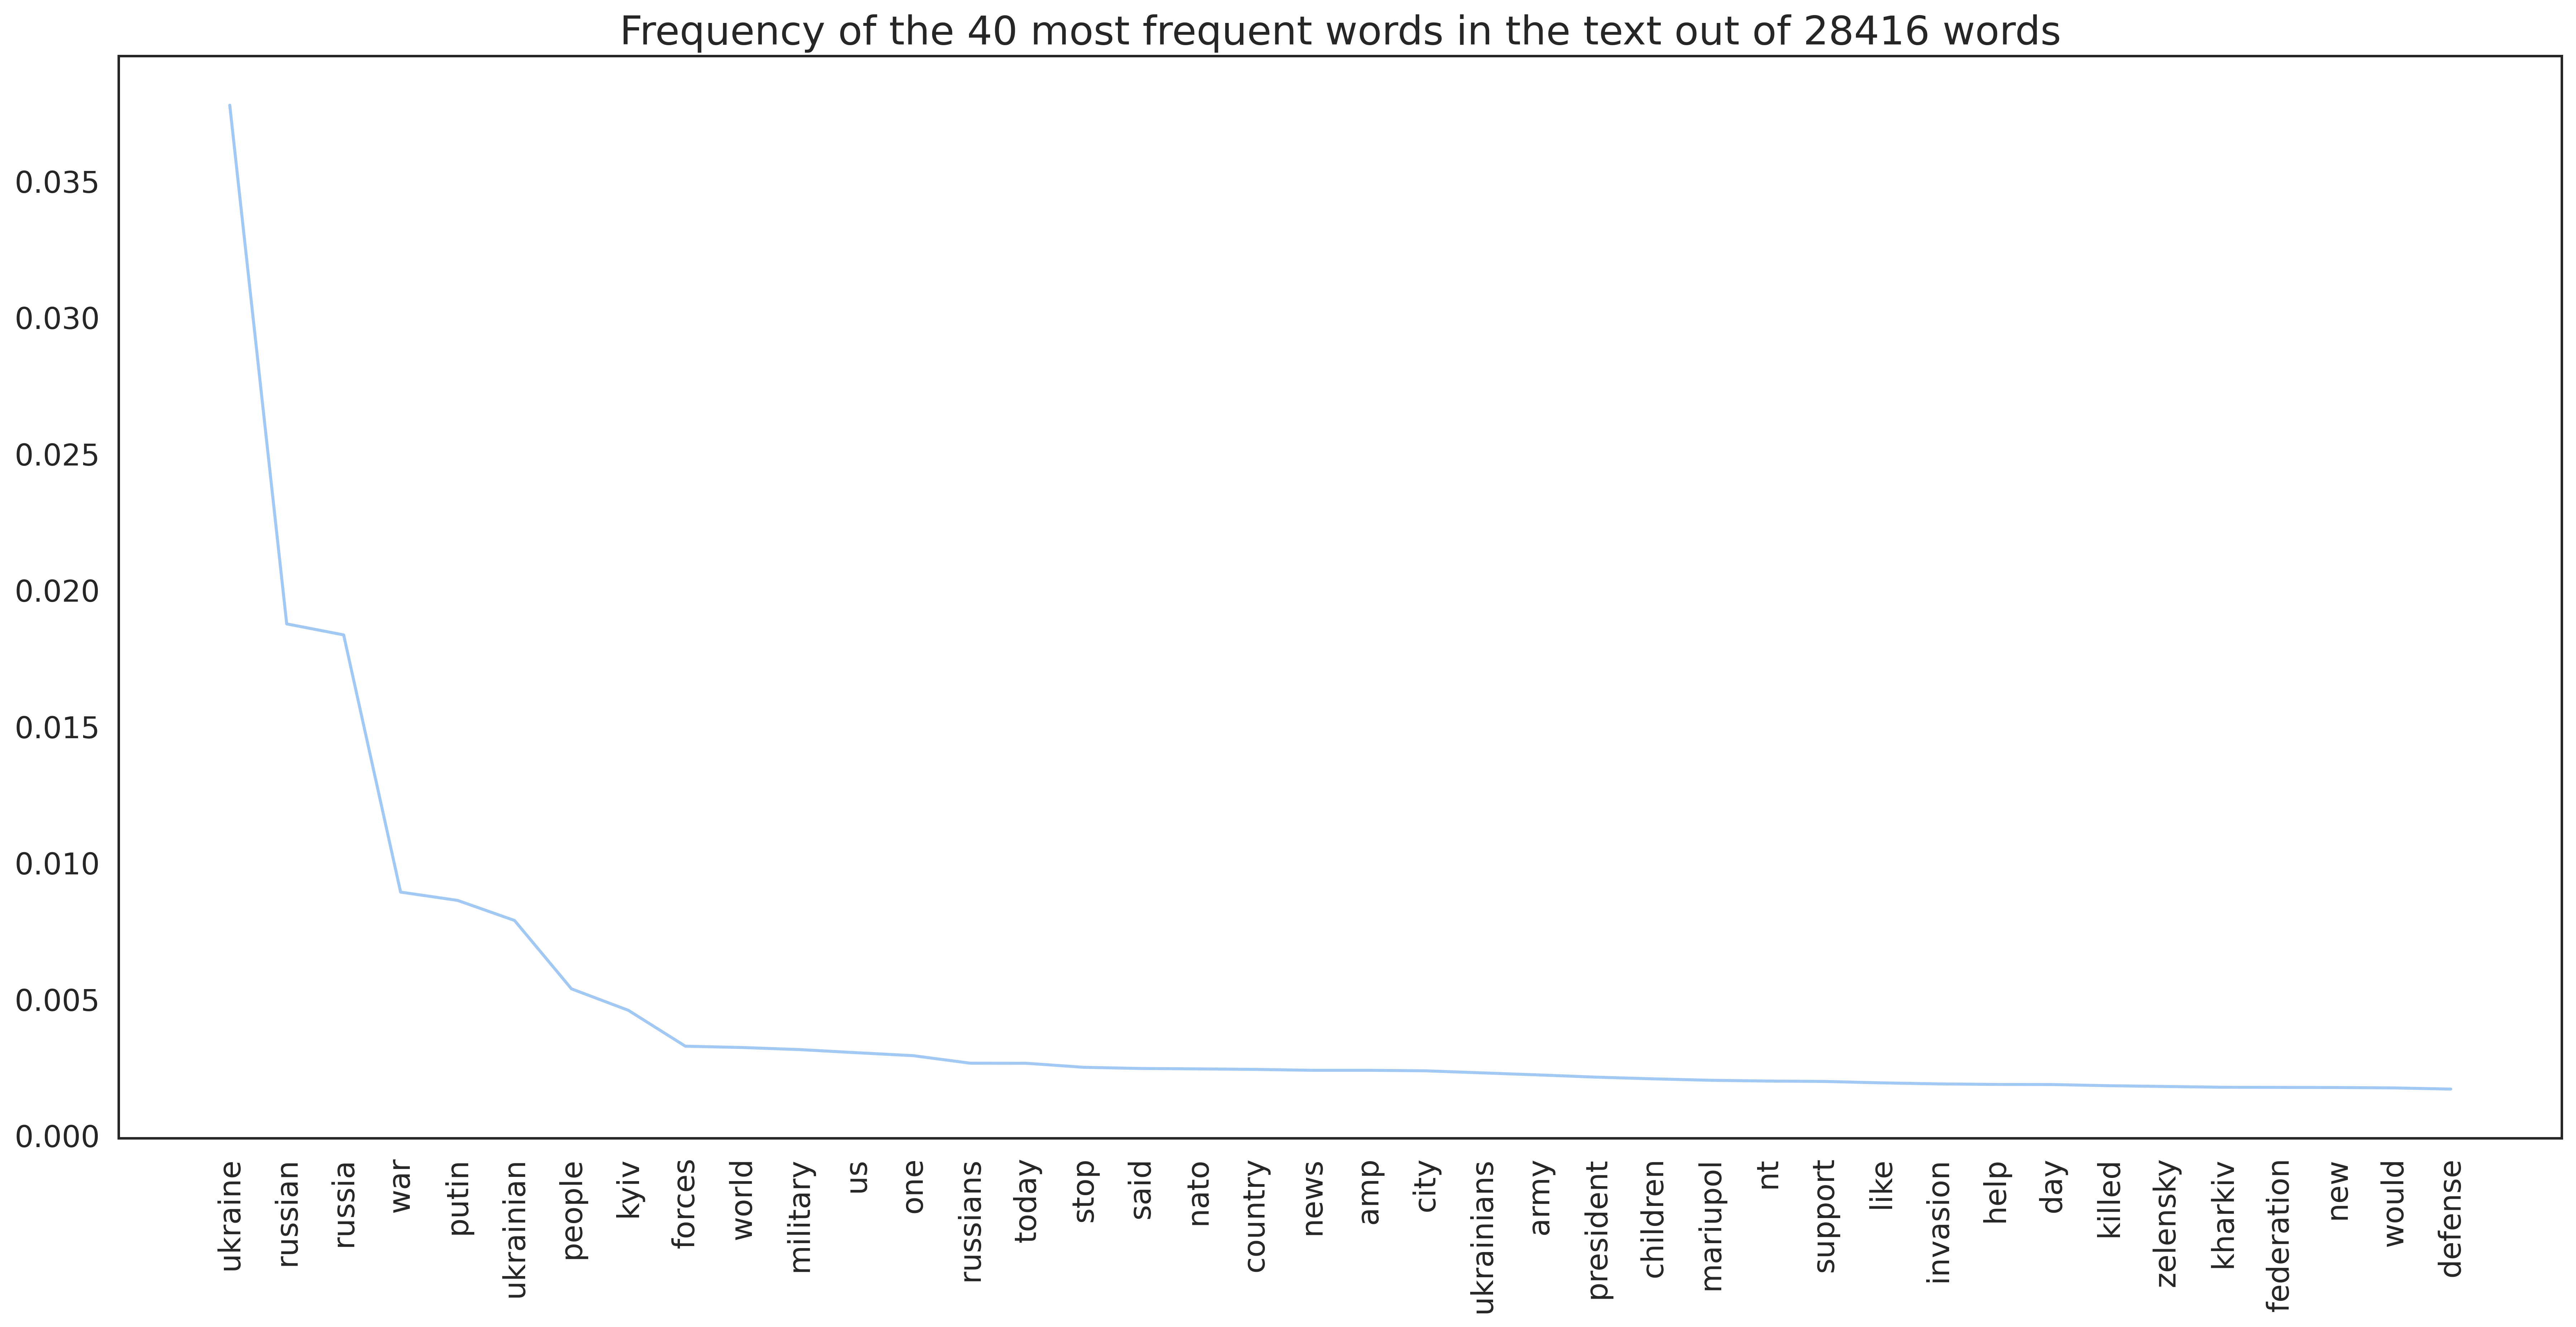

In [156]:
fig, ax = plt.subplots(figsize=(22,10),dpi=400)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=15)
N = 40
ax.plot(*zip(*freq_list[:N]))
plt.title(label=f'Frequency of the {N} most frequent words in the text out of {len(freq_dist)} words', fontdict={'fontsize': 20});
plt.show()
plt.close()

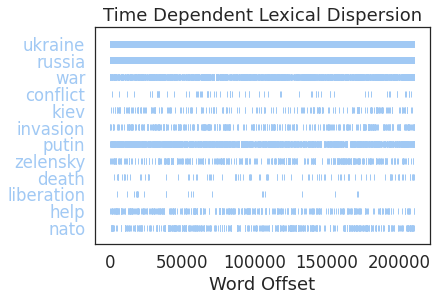

In [118]:
# war, conflict, invasion, putin, zelensky, kiev, andre byer, liberation
nltk.draw.dispersion_plot(text.split(' '), ['ukraine', 'russia', 'war', 'conflict', 'kiev', 'invasion', 'putin', 'zelensky', 'death', 'liberation', 'help', 'nato'], title='Time Dependent Lexical Dispersion')

In [ ]:
# This box can probably be removed, since we can just say we create a mask of them, but idk
def convert(image):
    f = image.flatten()
    for i, pixel in enumerate(f):
        if pixel > 50:
            f[i] = 255
    return f.reshape(image.shape)
path = '/home/kjb/Desktop/DTU - Semester 4/DTU - Computational Social Science/02467-final/word-frequency/image-mask/putin-zelensky-2.jpg'
img = Image.open(path)
imgG = img.convert('L')
Image.fromarray(convert(np.array(imgG))).save('./img-mask.png')   

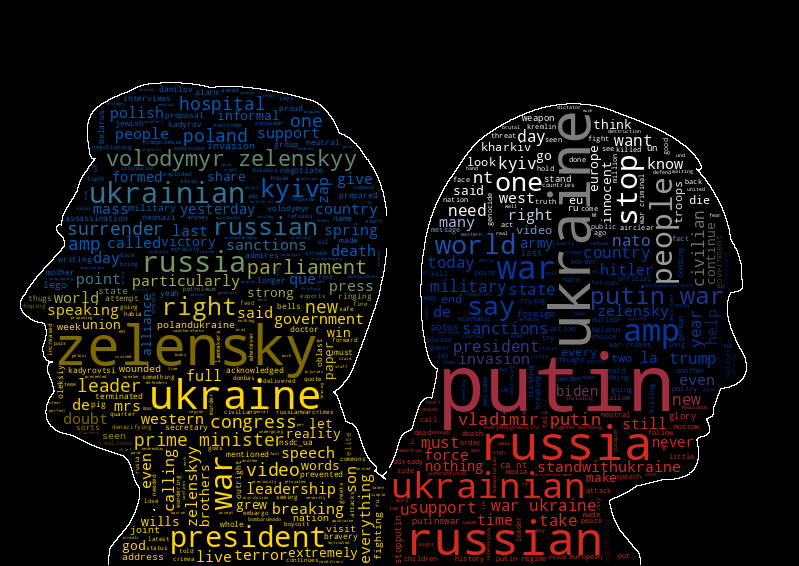

<Figure size 4000x4000 with 0 Axes>

<Figure size 4000x4000 with 0 Axes>

In [84]:
def color_wordcloud(image, color_image, text, visualize=True, background_color="black", contour_color='white', contour_width=1):
    wc = WordCloud(background_color=background_color, max_words=10000, mask=image,
                    contour_width=contour_width,mode='RGB',width=500,height=500, contour_color=contour_color).generate(text)
    image_colors = ImageColorGenerator(color_image)
    plt.figure(figsize=[40,40],dpi=100)
    word_cloud = wc.recolor(color_func=image_colors)
    if visualize:
        plt.imshow(word_cloud, interpolation="bilinear")
        plt.axis("off")
        plt.show()
        plt.close()
    return word_cloud

# change these paths later
path = '/home/kjb/Desktop/DTU - Semester 4/DTU - Computational Social Science/02467-final/word-frequency/image-mask/p.png'
putin_mask = np.array(Image.open(path))
path_color = '/home/kjb/Desktop/DTU - Semester 4/DTU - Computational Social Science/02467-final/word-frequency/image-mask/p-color.png'
putin_color = np.array(Image.open(path_color))

p_word = color_wordcloud(putin_mask, putin_color, p_text, visualize=False)

# change these paths later
path = '/home/kjb/Desktop/DTU - Semester 4/DTU - Computational Social Science/02467-final/word-frequency/image-mask/z.png'
z_img = np.array(Image.open(path))
path_color = '/home/kjb/Desktop/DTU - Semester 4/DTU - Computational Social Science/02467-final/word-frequency/image-mask/z-color.png'
z_color = np.array(Image.open(path_color))

z_word = color_wordcloud(z_img, z_color, z_text, visualize=False)

def extend_image(images):
    widths, heights = zip(*(i.size for i in images))

    total_width = sum(widths)
    max_height = max(heights)

    new_im = Image.new('RGB', (total_width, max_height))

    x_offset = 0
    for im in images:
        new_im.paste(im, (x_offset,0))
        x_offset += im.size[0]
    return new_im

images = [z_word.to_image(),p_word.to_image()]
new_im = extend_image(images)
new_im.save('/home/kjb/Desktop/DTU - Semester 4/DTU - Computational Social Science/02467-final/word-frequency/image-mask/z_p.png')
new_im